In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Vandermond(x, y, n):
    V = np.empty([len(x), n + 1])
    for i in range(len(x) - 1):
        for j in range(n + 1):
            V[i, j] = x[i] ** (n - j)
    return V

In [3]:
def LeastSquare(V, y):
    Vt = np.transpose(V)
    A = Vt @ V
    Y = Vt @ y
    b = np.linalg.solve(A, Y)
    return b

In [7]:
def fitpolynomial(x, b, n):
    Ps = []
    p = b[0]
    for i in range(1, n + 1):
        p += b[i] * x ** (n - i)
        Ps[i - 1] = p
    return Ps

In [5]:
def SSE(P, y):
    k = np.subtract(P, y)
    error = np.sum(k * k)
    return error


ValueError: operands could not be broadcast together with shapes (0,) (16,) 

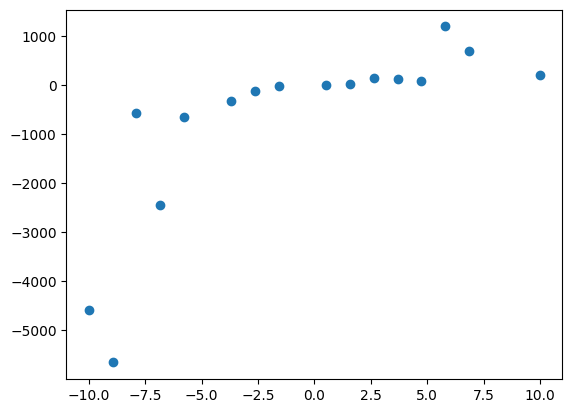

In [8]:
x = np.linspace(-10, 10, 20)
x_train = np.random.choice(x, int(0.8*len(x)), replace = False)
y_train = np.random.uniform(0, 10, int(0.8*len(x))) * x_train ** 3 + np.random.uniform(0, 10, int(0.8*len(x)))
plt.scatter(x_train, y_train)
x_test = np.setdiff1d(x, x_train)
n = 3
train_error = np.empty(n)
order = np.arange(1, n + 1, 1)
for i in range(n + 1):
    V = Vandermond(x_train, y_train, i)
    b = LeastSquare(V, y_train)
    p = fitpolynomial(x_train, b, i)
    print(p)
    error = SSE(p, y_train)
    plt.plot(x_train, p)
    np.append(train_error, error)
print(train_error, order)
plt.show()
plt.plot(order, train_error, label = "Train")
plt.legend()
plt.show()

